# Birth-Death

This is for an integrated test of E-Cell4. Here, we test a simple birth-death process in volume.

In [1]:
%matplotlib inline
import numpy
from ecell4 import *

Parameters are given as follows. `D` and `radius` mean a diffusion constant and a radius of molecules, respectively. Dimensions of length and time are assumed to be micro-meter and second.

In [2]:
D = 1  # 0.01
radius = 0.005

In [3]:
N = 20  # a number of samples
rng = GSLRandomNumberGenerator()
rng.seed(0)

In [4]:
y0 = {} # {'A': 60}
T = numpy.linspace(0, 3, 101)
V = 8

Make a model for all algorithms. No birth reaction with more than one product is accepted.

In [5]:
with species_attributes():
    A | {'radius': str(radius), 'D': str(D)}

with reaction_rules():
    ~A > A | 45.0
    A > ~A | 1.5

m = get_model()

Save a result with `ode` as `obs`, and plot it:

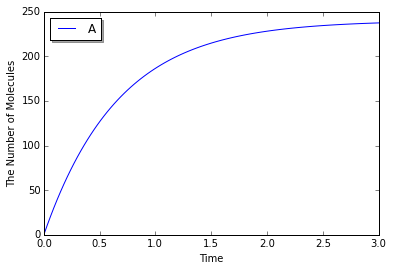

In [6]:
obs = run_simulation(T, y0, volume=V, model=ode.ODENetworkModel(m), return_type='observer',
                     solver='ode')
viz.plot_number_observer(obs)

Simulating with `gillespie`:

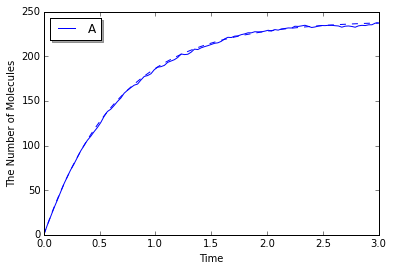

In [7]:
ensemble_simulations(N, T, y0, volume=V, model=m, return_type='matplotlib', plot_args=('-', obs, '--'),
                     factory=gillespie.GillespieFactory(rng))

Simulating with `meso`:

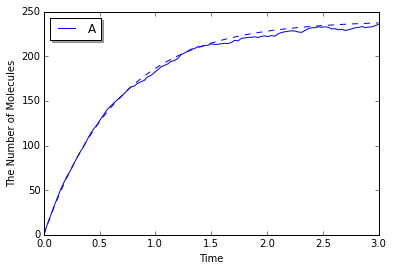

In [8]:
ensemble_simulations(N, T, y0, volume=V, model=m, return_type='matplotlib', plot_args=('-', obs, '--'),
                     factory=meso.MesoscopicFactory(0.25, rng))

Simulating with `lattice`:

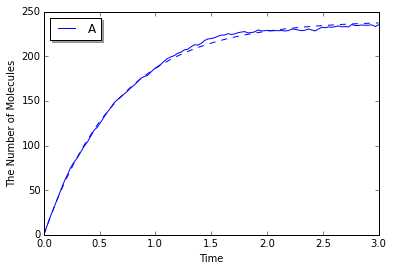

In [9]:
ensemble_simulations(N, T, y0, volume=V, model=m, return_type='matplotlib', plot_args=('-', obs, '--'),
                     factory=lattice.LatticeFactory(radius, rng))

Simulating with `egfrd`:

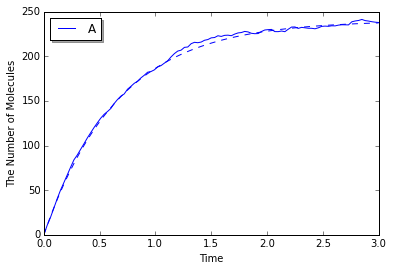

In [10]:
ensemble_simulations(N, T, y0, volume=V, model=m, return_type='matplotlib', plot_args=('-', obs, '--'),
                     factory=egfrd.EGFRDFactory(Integer3(4, 4, 4), rng))